# Car Sales Regression
## Predicting Price of Cars using Regression

> Throughout this project, we will be building a model to predict car sales prices using a handful of features.

## 1. Project Definition
> This is a project I worked on while beginning my data science journey.  The project was a part of ZeroToMastery's online course.
> 
> This is an example of a practical use case of regression analysis, where you can use a model that has a high degree of predictive accuracy to identify potential undervalued assets that an organization or individual could purchase then resell at a profit.  Similar methods have been utilized across many industries, but most publicly in real estate.

## 2. Data
> The dataset has 1,000 observations, four features, and one target (price).  There are missing data points that must be addressed.

## 3. Evaluation
> We'll consider an R-Squared of 0.5 to be a good test to see if this project would have potential as a predictive algorithm with additional data & features.

## 4. Feature Definitions

> * **Make** - The car's brand (Honda, BMW, Toyota, etc)
> 
> * **Colour** - The color of the car
> 
> * **Odometer (KM)** - How many KM the car has been driven, a proxy for expected reliability and lifespan
> 
> * **# of Doors** - Number of doors the car has, a proxy for the approximate size of the car

## 5. Modeling

### 5.1 Prepare the Tools

In [1]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 5.2 General Exploratory Analysis

In [2]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


Text(0.5, 1.0, 'Count of Make')

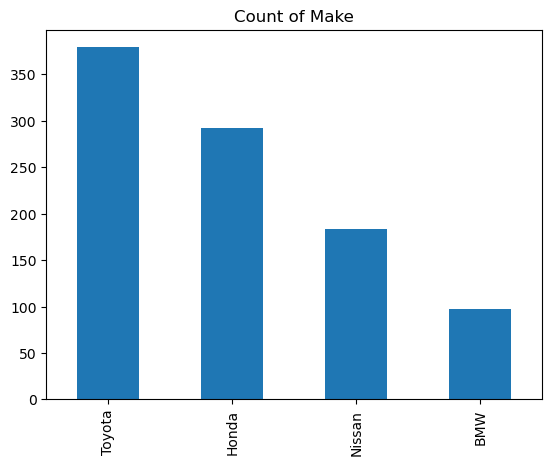

In [4]:
Make_Count = car_sales["Make"].value_counts().plot.bar()
plt.title("Count of Make")

Text(0.5, 1.0, 'Count of Colour')

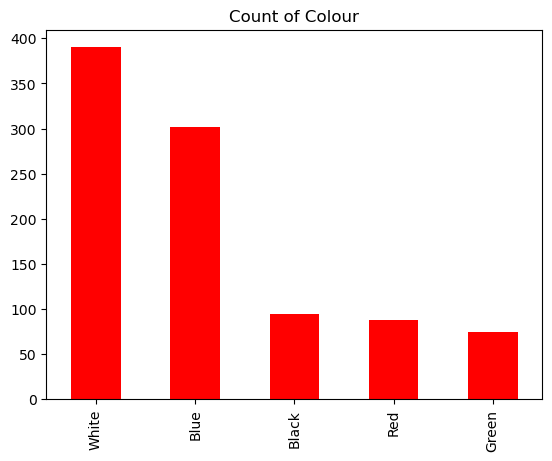

In [5]:
car_sales["Colour"].value_counts().plot.bar(color="Red")
plt.title("Count of Colour")

Text(0.5, 1.0, 'Histogram of Odometer (KM)')

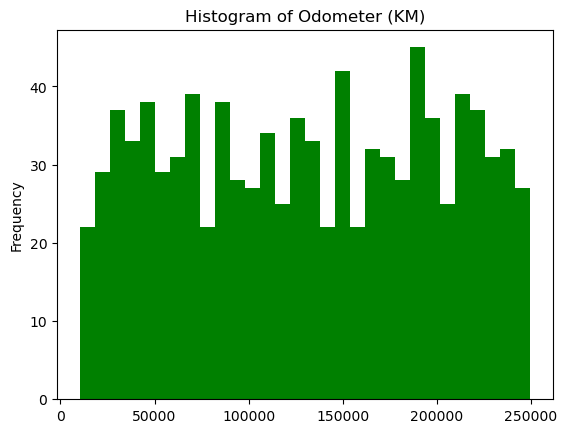

In [6]:
car_sales["Odometer (KM)"].plot.hist(bins=30, color="Green")
plt.title("Histogram of Odometer (KM)")

<Figure size 2400x1600 with 0 Axes>

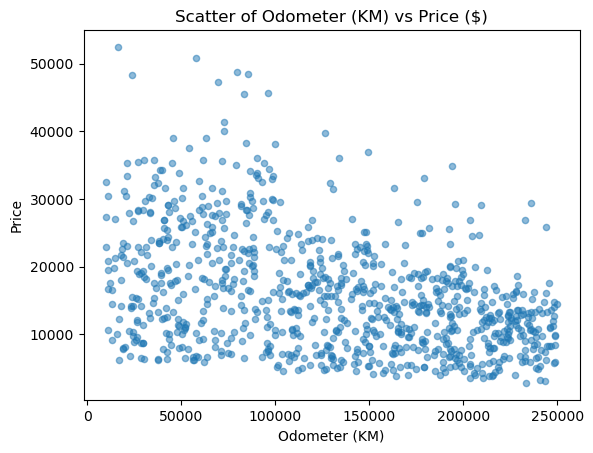

In [7]:
plt.figure(figsize=(12,8), dpi=200);

car_sales.plot.scatter(x = "Odometer (KM)", y = "Price", alpha = 0.5);
plt.title("Scatter of Odometer (KM) vs Price ($)");

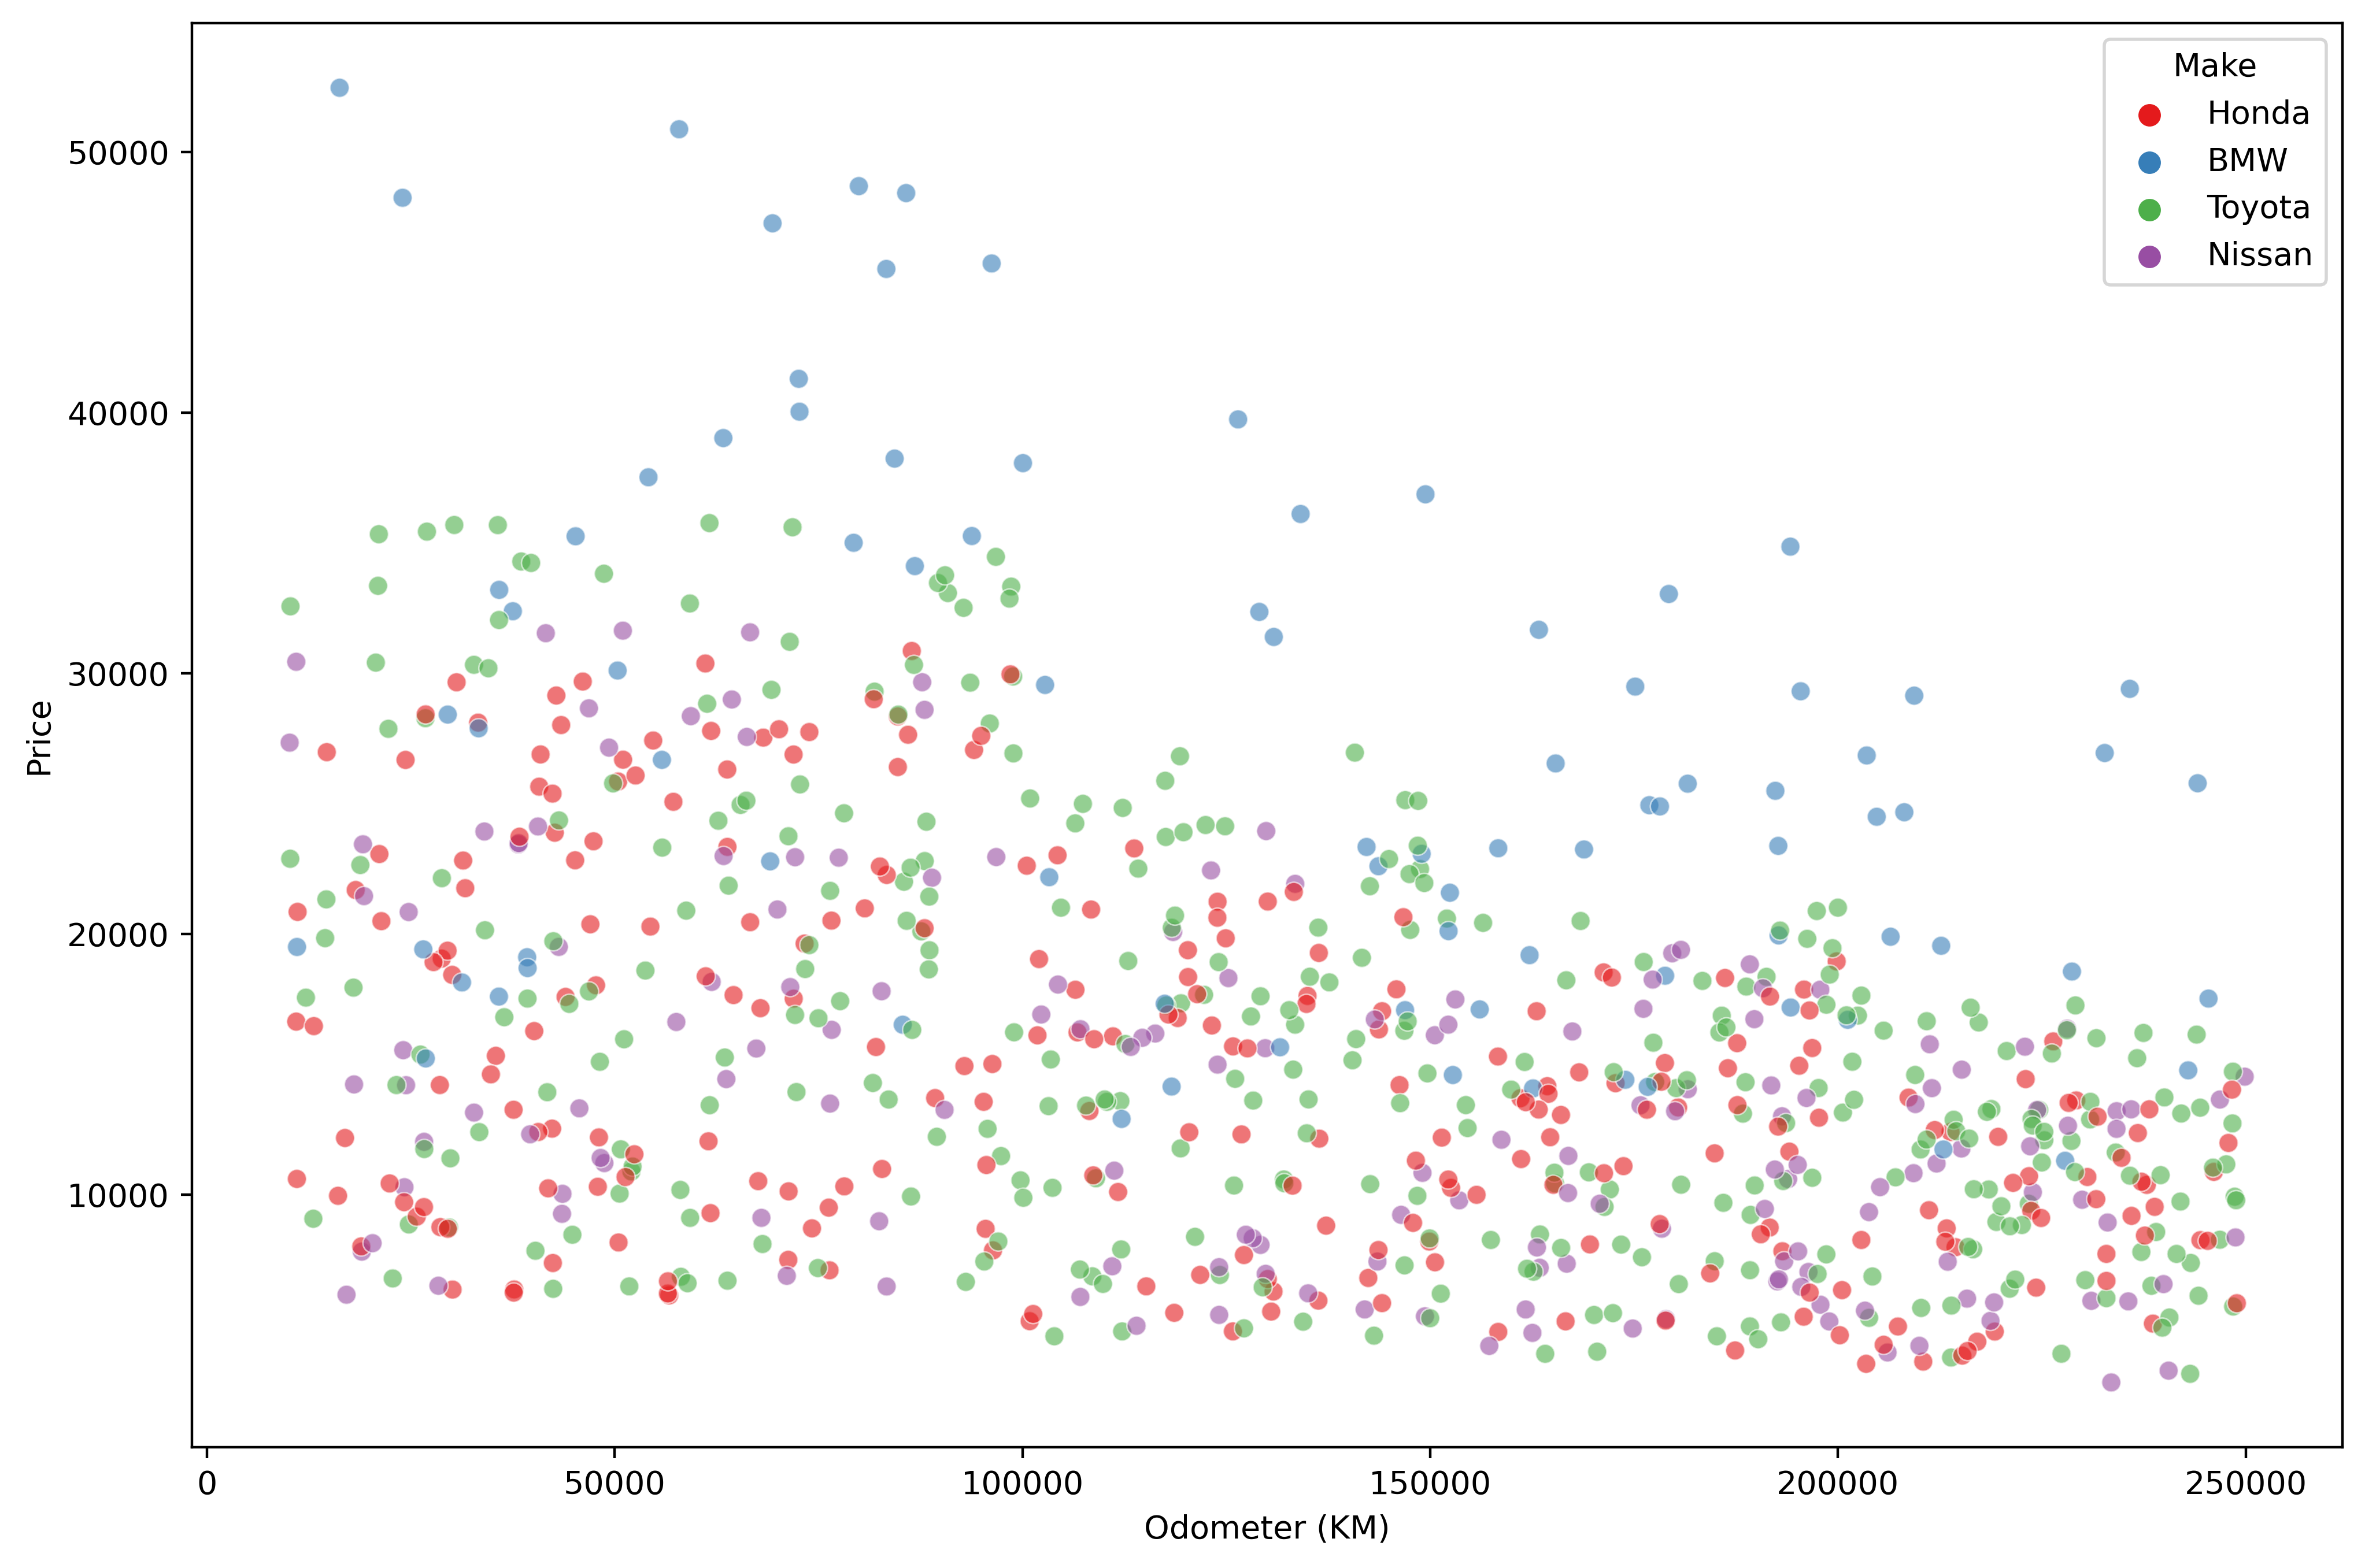

In [8]:
plt.figure(figsize=(12,8), dpi=400)

sns.scatterplot(data=car_sales,
                x=car_sales["Odometer (KM)"],
                y=car_sales["Price"],
                hue=car_sales["Make"],
                palette="Set1",
                alpha=0.6);

### 5.3 Check for Missing Data

In [9]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [10]:
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [11]:
car_sales.dropna(subset=["Price"], axis=0, inplace = True)

In [12]:
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

### 5.3 Prepare our Pipelines

In [13]:
car_sales.Make.unique(), car_sales.Colour.unique()

(array(['Honda', 'BMW', 'Toyota', 'Nissan', nan], dtype=object),
 array(['White', 'Blue', 'Red', 'Green', nan, 'Black'], dtype=object))

***There are few enough unique values in the non-numerical fields that OneHotEncoder is a reasonable choice***

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [15]:
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

In [16]:
door_feature = ["Doors"]

door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "constant", fill_value = 4))])

In [17]:
numerical_features = ["Odometer (KM)"]

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "median"))])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("numerical", numerical_transformer, numerical_features)])

### 5.4 Train Test Split

In [19]:
X = car_sales.drop("Price", axis=1)

y = car_sales["Price"]

In [20]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((760, 4), (190, 4), (760,), (190,))

In [21]:
X_train['Odometer (KM)'].max(), X_train['Odometer (KM)'].min(), X_train['Odometer (KM)'].max() - X_train['Odometer (KM)'].min()

(249860.0, 10148.0, 239712.0)

In [22]:
y_train.max(), y_train.min(), y_train.max() - y_train.min()

(52458.0, 2796.0, 49662.0)

### 5.5 Fit Various Models

In [23]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [24]:
reg_models = {
    "Ridge":Ridge(),
    "SVR_lin":SVR(kernel="linear"),
    "SVR_rbf":SVR(),
    "RFR":RandomForestRegressor(),
    "Lasso":Lasso(max_iter=5000)
}

reg_results = {}

In [25]:
for model_name, model in reg_models.items():
    model_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("scaler", StandardScaler()),
        ("model", model)])
    
    print(f'Fitting {model_name}...')
    model_pipeline.fit(X_train, y_train)
    
    print(f'Scoring {model_name}...')
    reg_results[model_name] = model_pipeline.score(X_test, y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_lin...
Scoring SVR_lin...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RFR...
Scoring RFR...
Fitting Lasso...
Scoring Lasso...


In [26]:
print(reg_results)

{'Ridge': 0.2537367002302803, 'SVR_lin': 0.043424287378737714, 'SVR_rbf': -0.0030588062614465006, 'RFR': 0.22287723899081657, 'Lasso': 0.25378311050204994}


In [27]:
np.random.seed(42)

ridge_pipeline = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Ridge())])

ridge_pipeline.fit(X_train, y_train)

y_preds_ridge = ridge_pipeline.predict(X_test)

In [28]:
np.random.seed(42)

lasso_pipeline = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Lasso(max_iter=5000))])

lasso_pipeline.fit(X_train, y_train)

y_preds_lasso = lasso_pipeline.predict(X_test)

**Let's calculate some metrics!**

In [29]:
def metrics_scoring(y_test, y_preds):
    mse = mean_squared_error(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)
    r2 = r2_score(y_test, y_preds)
    
    scores = {"Mean Squared Error":mse.round(2),
             "Mean Absolute Error":mae.round(2),
             "R-Squared Score":r2}
    
    return scores

In [30]:
metrics_scoring(y_test, y_preds_ridge)

{'Mean Squared Error': 49969561.46,
 'Mean Absolute Error': 5714.39,
 'R-Squared Score': 0.2537367002302803}

In [31]:
metrics_scoring(y_test, y_preds_lasso)

{'Mean Squared Error': 49966453.84,
 'Mean Absolute Error': 5714.23,
 'R-Squared Score': 0.25378311050204994}

**Let's do some hyperparameter tuning for the Ridge model**

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(42)

ridge_reg_grid = {
    'model__alpha':np.logspace(1.5, 10, 1000),
    'model__fit_intercept':[True, False]
}

ridge_reg = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Ridge())])

ridge_search = RandomizedSearchCV(estimator=ridge_reg,
                              param_distributions=ridge_reg_grid,
                              n_iter=50,
                              cv=5,
                              verbose=True)

ridge_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Make',
                                                                                'Colour']),
                                                                              ('door',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value=4,
                                                                                                              strategy='constant')...
       6.89189002e+09, 7.02824426e+09, 7.16729624e+09, 7.30909933e+09,
       7.45370795e+09, 7.60117762e+09, 7.75156493e+09, 7.90492762e+09,
       8.06132455e+09, 8.22081576e+09, 8.38346245e+09, 8.54932707e+09,
       8.71847327e+09, 8.89096599e+09, 9.06687143e+09, 9.24625712e+09,
       9.42919190e+09, 9.61574600e+09, 9.80599103e+09, 1.00000000e+10]),
                                        'model__fit_intercept': [True, False]},
                   verbose=True)

In [33]:
ridge_search.score(X_test, y_test)

0.25788548308669557

In [34]:
ridge_search.best_params_

{'model__fit_intercept': True, 'model__alpha': 54.73161183776532}

**Now let's do hyperparameter tuning for the Lasso model**

In [35]:
np.random.seed(42)

lasso_reg_grid = {
    'model__alpha':np.logspace(1.5, 10, 1000),
    'model__fit_intercept':[True, False]
}

lasso_reg = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Lasso())])

lasso_search = RandomizedSearchCV(estimator=lasso_reg,
                              param_distributions=ridge_reg_grid,
                              n_iter=50,
                              cv=5,
                              verbose=True)

lasso_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('categorical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Make',
                                                                                'Colour']),
                                                                              ('door',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value=4,
                                                                                                              strategy='constant')...
       6.89189002e+09, 7.02824426e+09, 7.16729624e+09, 7.30909933e+09,
       7.45370795e+09, 7.60117762e+09, 7.75156493e+09, 7.90492762e+09,
       8.06132455e+09, 8.22081576e+09, 8.38346245e+09, 8.54932707e+09,
       8.71847327e+09, 8.89096599e+09, 9.06687143e+09, 9.24625712e+09,
       9.42919190e+09, 9.61574600e+09, 9.80599103e+09, 1.00000000e+10]),
                                        'model__fit_intercept': [True, False]},
                   verbose=True)

In [36]:
lasso_search.score(X_test, y_test)

0.2684025705686188

In [37]:
lasso_search.best_params_

{'model__fit_intercept': True, 'model__alpha': 110.80122057036918}

In [38]:
lasso_clf = Pipeline(steps=[
                            ("preprocessor", preprocessor),
                            ("scaler", StandardScaler()),
                            ("model", Lasso(
                            fit_intercept=True,
                            alpha=110.80122057036918
                            ))])

lasso_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Make', 'Colour']),
                                                 ('door',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=4,
                                                                                 strategy='constant'))]),
                                                  ['Doors']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Odometer (KM)'])])),
                ('scaler', StandardScaler()),
                ('model', Lasso(alpha=110.80122057036918))])

In [39]:
lasso_clf.score(X_test, y_test)

0.2684025705686188

## 6. Evaluation

**We've got a bit of improvement in the Lasso model, but it's still far from the 0.50 R-Squared that we were using as our benchmark metric.  Based on the evaluation standards that we setup before we wouldn't move forward with this project as it is.**

**Save the model**

In [40]:
from joblib import dump
dump(lasso_clf, "car_price_lasso.joblib")

['car_price_lasso.joblib']